# pytorch neural network classification

- **Regression** is predicting a number (chp1)
- **Classification** is predicting a thing (this, chp2)

![Mulclass classification workflow](./images/multiclass.png)

| Binary | Multiclass |
|--------|------------|
| has only two categories eg: an image is either a dog or cat | has more than two categories eg: a picture of a dish could be sushi, steak, spag, or pizza |


**what we're going to cover**
- architecture of a neural network classification model
- input shapes and output shapes of a classification model (features and labels)
- creating custom data to view, fit on and predict on
- steps in modelling
  - creating a model, setting a loss function and optimizer, creating a training loop, evaluating a model
- saving and loading models
- harnessing the power of non-linearity
- different classification evaluation methods

### make classification data and get it ready

In [ ]:
import sklearn 
from sklearn.datasets import make_circles 
import matplotlib.pyplot as plt 
import pandas as pd 
import numpy as np 




In [ ]:
# remember equation of a circle: x^2 + y^2 = 1
# so the make_circles will produce two features and one target

# make 1000 samples 
samples = 1000

# create circles
X, y = make_circles(samples,
                    random_state=97,
                    noise=0.03,
                    )

print( len(X), len(y) )
print(
    f'first few samples of X: {X[:5]} \nfirst few samples of y: {y[:5]}'
)

In [ ]:
# make a dataframe of circles data

circlesdf = pd.DataFrame({'X1': X[:, 0],
                          'X2': X[:, 1],
                          'label': y}
                          )
circlesdf.head()

In [ ]:
# visualize the circlesdf
plt.scatter(x=circlesdf.iloc[:,0],
            y=circlesdf.iloc[:,1],
            c=circlesdf.iloc[:,2],
            cmap=plt.cm.RdYlBu)
plt.show()

In [ ]:
circlesdf.iloc[:,1]

In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import sklearn 
from sklearn.datasets import make_circles 


RANDOM_STATE = 97 # random variable for all random states

### creating a toy dataset for our classification task

In [ ]:
samples = 1000 # number of samples
X, y = make_circles(samples, 
                    random_state=RANDOM_STATE,
                    noise=0.07)

# creating a dataframe for our top dataset 
circles_df = pd.DataFrame({'x1': X[:,0],
                           'x2': X[:,1],
                           'label':y})
circles_df.head()

In [ ]:
# vizualize, vizualize, visualize our data
plt.figure(figsize=(5,5))
plt.scatter(x=circles_df['x1'], y=circles_df['x2'], c=circles_df['label'], cmap=plt.cm.RdYlBu)
plt.show()

In [ ]:
# check input and output shapes
X.shape, y.shape

In [ ]:
X

### convert data into tensors and create train and test splits

In [ ]:
import torch 

the `.type(torch.float)` is used to convert the default float64 to float32

In [ ]:
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)


X[:5], y[:5]

### splitting our data set into train and test sets

In [ ]:
from sklearn.model_selection import train_test_split 

xtrain, xtest, ytrain, ytest = train_test_split(X,
                                                y,
                                                test_size=0.3,
                                                shuffle=True,
                                                random_state=RANDOM_STATE)

len(xtrain), len(xtest), len(ytrain), len(ytest)




### building a model to classify our blue and red dots

to do list:
- setup device agnostic code (put tensors on gpu if it exits)
- construct a model 
- define a loss function and optimizer
- create a training loop and test loop

In [ ]:
import torch 
from torch import nn 


device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [ ]:
class CircleClassify(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer1 = nn.Linear(2, 5)
        self.layer2 = nn.Linear(5, 1)

    def forward(self, x):
        x = self.layer1(x)
        x = self.layer2(x)
        return x
    
mdl = CircleClassify().to(device)
mdl


In [ ]:
mdl.state_dict()

In [ ]:
# using nn.Sequential()

class CircleMdl(nn.Module):
    def __init__(self):
        super().__init__()
        self.feature_extractor = nn.Sequential(
            nn.Linear(2, 5),
            nn.Linear(5, 1),
        )

    def forward(self, x):
        return self.feature_extractor(x)

mdl2 = CircleMdl().to(device)
mdl2 


In [ ]:
mdl2.state_dict()

In [ ]:
# make initial predictions 
with torch.inference_mode():
    untrained_preds = mdl2(xtest.to(device))

print(f'length of predictions: {len(untrained_preds)}, shape: {untrained_preds.shape}')
print(f'length of test samples: {len(xtest)}, shape: {xtest.shape}')
print(f'\nfirst 10 predictions:\n{untrained_preds[:10]}')
print(f'\nfirst 10 labels:\n{ytest[:10]}')

- get dataset (visualize data)
- split into train and test sets
- create model
- define loss function 
- choose optimizer
- create training loop
- create testing loop


In [ ]:
import torch 
from torch import nn 
import matplotlib.pyplot as plt 
from sklearn.datasets import make_circles 
from sklearn.model_selection import train_test_split

RANDOM_STATE = 29
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [ ]:
# creating toy dataset using the make circle from sklearn
samples_size = 3000

x, y = make_circles(samples_size,
                    noise=.06,
                    random_state=RANDOM_STATE)

# visualizing the data
plt.figure(figsize=(6,5))
plt.scatter(x[:,0], x[:,1], c=y, cmap=plt.cm.RdYlBu)
plt.title('Classification Toy Data')
plt.show()

In [ ]:
# converting arrays into tensors
x = torch.from_numpy(x).type(torch.float).to(device) # converting it to torch32
y = torch.from_numpy(y).type(torch.float).to(device)

x.dtype, y.dtype

In [ ]:
# splitting dataset into train and test sets
xtrain, xtest, ytrain, ytest = train_test_split(x, y, shuffle=True, train_size=0.7, random_state=RANDOM_STATE)

xtrain.shape, ytrain.shape, xtest.shape, ytest.shape 

In [ ]:
# creating a simple classification model

class SimpleNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer1 = nn.Linear(2, 5)
        self.layer2 = nn.Linear(5, 1)

    def forward(self, x):
        return self.layer2(self.layer1(x))
    

mymdl = SimpleNet().to(device)


In [ ]:
# define loss function and choose optimizer 
criterion = nn.BCELoss() # binary cross entropy loss

optimizer = torch.optim.Adam(mymdl.parameters(), lr=0.01)

In [ ]:
import torch 
from torch import nn 
import matplotlib.pyplot as plt 
from sklearn.datasets import make_circles 
from sklearn.model_selection import train_test_split 
from torchsummary import summary


RANDOM_STATE = 28
DEVICE = 'cuda' if torch.cuda.is_available() else 'cpu'

In [ ]:
# dataset
make_samples = 10000
x, y = make_circles(
    make_samples,
    noise=0.07,
    random_state=RANDOM_STATE
)
print(x.shape, y.shape)

# visualize data
plt.figure(figsize=(6,5)) 
plt.scatter(x[:,0], x[:,1], c=y, cmap=plt.cm.RdYlBu, s=3)
plt.show()

# create tensor dataset and split into train and test sets
x = torch.from_numpy(x).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

xtrain, xtest, ytrain, ytest = train_test_split(
    x, y,
    train_size=.7,
    random_state=RANDOM_STATE
)
print(
    f'Train set shape (x,y): {xtrain.shape}, {ytrain.unsqueeze_(-1).shape} \
    \nTest set shape (x,y): {xtest.shape}, {ytest.unsqueeze_(-1).shape}'
)

In [ ]:
# creating model 
class BinaryClassifier(nn.Module):
    def __init__(self, nclasses=2):
        super().__init__()
        self.layer1 = nn.Linear(2, 5)
        self.layer2 = nn.Linear(5, 1)

    def forward(self, x:torch.Tensor):
        x = self.layer1(x)
        x = self.layer2(x)
        return x

model = BinaryClassifier()
summary(model, (xtrain.shape))

In [ ]:
model.state_dict()

In [ ]:
# make predictions with untrained parameters

with torch.inference_mode():
    untrained_preds = model(xtest)

print(
    f'untrained preds: \n{untrained_preds[:5]}\nGround truth \n{ytest[:5]}'
)

**logits** are the raw values of a linear computation that is passed to an activation function. they become prediction probabilities when the are passed through an activation function (eg: sigmoid for binary classification, softmax for multi-class classification) <br>

Common loss functions for binary classification and their difference

| loss function | what has happened | 
|---------------|-------------------|
| `nn.BCELoss()` | requires the logits to have gone through the sigmoid activation function and thus the inputs should be squashed btween 0 and 1 |
| `nn.BCEWithLogitsLoss()` | has the sigmoid function built in so it requires the inputs to be logits |

**NB: `nn.BCEWithLogitsLoss()` is more stable, and it is recommended to use that for binary classification**

In [ ]:
# defining a loss function and choosing an optimizer
criterion = nn.BCEWithLogitsLoss() # has the sigmoid activatio function built-in

optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

# calculating accuracy - what percentage the model gets corrects

def accuracy_fn(ytrue, ypred):
    """ defining a custom accuracy function"""
    correct = torch.eq(ytrue, ypred).sum().item()
    acc = ( correct / len(ypred) ) * 100
    return acc 

- get data
- create model
- define loss function 
- choose optimizer

In [ ]:
import torch 
import torch.nn as nn 
import torch.optim as optim
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split 
import matplotlib.pyplot as plt 


DEVICE = "cuda" if torch.cuda.is_available() else "cpu"
RANDOM_STATE = 73 

**dataset**

In [ ]:
# creating random categorical dataset with two classes

x, y = make_circles(5000, noise=0.07, random_state=RANDOM_STATE)
x = torch.from_numpy(x).type(torch.float).to(DEVICE)
y = torch.from_numpy(y).type(torch.float).unsqueeze(-1).to(DEVICE)

xtrain, xtest, ytrain, ytest = train_test_split(x, y,
                                                train_size=0.75,
                                                random_state=RANDOM_STATE,
                                                shuffle=True,
                                                stratify=y)

print(x[:5], y[:5])
print(xtrain.shape, ytrain.shape, xtest.shape, ytest.shape)

**visualize the data**

In [ ]:
# visualize the data
plt.figure(figsize=(6,5))
plt.scatter(x[:,0], x[:,1], s=2, c=y, cmap=plt.cm.RdYlBu)
plt.show()

**create model**

In [ ]:
# create model 
class BinClassification(nn.Module):
    def __init__(self):
        super().__init__()
        self.classifier = nn.Sequential(
            nn.Linear(in_features=2, out_features=5),
            nn.Linear(in_features=5, out_features=1)    # binaary classification: output neuron = 1
        )

    def forward(self, x:torch.Tensor):
        return self.classifier(x)

torch.manual_seed(RANDOM_STATE)
bcmdl = BinClassification().to(DEVICE)

In [ ]:
bcmdl

In [ ]:
bcmdl.state_dict() # current random parameters

In [ ]:
# untrained weights for  predictions 
with torch.inference_mode():
    predictions = bcmdl(xtest)

print(predictions[:5])
print(ytest[:5]) 

**evaluation metric, loss function, and optimizer**

| optimizer | problem type | pytorch code |
|-------------------------|--------------|--------------|
| Stochastic Gradient Descent (SGD) optimizer | classification, regression, many others. | `torch.optim.SGD()` |
| Adam Optimizer | classification, regression, many others. | `torch.optim.Adam()` |
| | | |
| **loss function** | **problem type** | **pytorch code** |
| binary cross entropy loss | binary classification | `torch.nn.BCELossWithLogits` or `torch.nn.BCELoss` |
| cross entropy loss | multi-class classification | `torch.nn.CrossEntropyLoss` |
| mean absolute error (MAE) or L1 Loss | regression | `torch.nn.L1Loss` |
| mean squared error (MSE) or L2 Loss | regression | `torch.nn.MSELoss` |



In [ ]:
# evaluation metric
def check_accuracy(prediction, ground_truth):
    """
        CHECK ACCURACY:
            Input: predicted values, ground truth values
            Output: float 

            A simple code to calculate the percentage of
            correctly predicted values.
            i.e.: (true positives + true negatives) / total length 
    """
    correct = torch.eq(prediction, ground_truth).sum().item()
    acc = correct / len(ground_truth)
    return acc * 100

In [ ]:
# loss and optimizer 
criterion = nn.BCEWithLogitsLoss()

optimizer = optim.SGD(bcmdl.parameters(), lr=0.1)

**again**

- our model outputs are goint to be raw **logits**
- we convert the logits into probabilities by passing it through an activation function (eg: sigmoid)
- **then we can convert our model's prediction probabilities to prediction labels by either `rounding` (for binary classification) them or taking the `argmax()` (for multi-class classification)**

for our prediction probability values, we need to perform a range-style rounding on them:
- ypred >= 0.5, y = 1 (class 1)
- ypred < 0.5, y = 0 (class 0)

**raw logits -> prediction probabilities -> class prediction**

**training loop and testing loop**

In [ ]:
epochs = 50

# put the data on target DEVICE
xtrain, ytrain = xtrain.to(DEVICE), ytrain.to(DEVICE)
xtest, ytest = xtest.to(DEVICE), ytest.to(DEVICE)

for epoch in range(epochs):
    # training loop 
    bcmdl.train()
    optimizer.zero_grad()
    ylogits = bcmdl(xtrain)#.squeeze()
    trainloss = criterion(ylogits, ytrain)
    trainloss.backward()
    optimizer.step()

    ypred = torch.round(torch.sigmoid(ylogits))
    trainacc = check_accuracy(ypred, ytrain)

    # evaluation loop
    bcmdl.eval()
    with torch.inference_mode():
        y_logits = bcmdl(xtest)#.squeeze()
        testloss = criterion(y_logits, ytest)

        predict_y = torch.round(torch.sigmoid(y_logits))
        testacc = check_accuracy(predict_y, ytest)

    # print out what's happening 
    if epoch % 10 == 0: # after every 10 epochs
        print(
            f'Epoch: {epoch} | Loss: {trainloss:.5f} | Acc: {trainacc:.2f} % | Test Loss: {testloss:.5f} | Test Acc: {testacc:.2f} %'
        )


**comment: our model doesn't seem to be learning anything since the accuracy is bouding around 50%. Synonymous to guessing (coin flip) if a data point is red or a blue dot** <br>

let's explore the possible reason this is occuring... visualize! visualize!! visualize!!!

In [ ]:
from helper_functions import plot_decision_boundary

In [ ]:
# plot decision boudning of our model 
plt.figure(figsize=(12,5))

plt.subplot(1, 2, 1)
plt.title('Train set')
plot_decision_boundary(bcmdl, xtrain, ytrain)

plt.subplot(1, 2, 2)
plt.title('Test set')
plot_decision_boundary(bcmdl, xtest, ytest)

**comment: our model is creating a linear line because our model is essentially made up of linear layers (lines)**

### Improving a model (from a model perspective)

1. Add more layers - give the model more chances to learn about the patterns in the data ...*(in our model above we only have two layers, we can increase them)*

2. Add more hidden units ...*(in our model above we could increase the hidden units from 5 to 10 or more to allow it to learn finer details of our data)*

3. Fit for longer ...*(we can increase the number of epochs)*

4. Change the learning rate ...*(we can reduce the lr=0.1 to a smaller number such as 0.01 or 0.001)*

5. Change the loss function ...*(we can explore the numerous loss function availabe in the documentation and check the performance)*

6. Change the optimizer ...*(we can use better optimization algorithm like RMSProp or Adam)*

**NOTE: in practice (a scientist) changes one thing at a time to see which tweak changes the accuracy the most**


In [ ]:
torch.manual_seed(RANDOM_STATE)

# creating a larger model 
class LargeBinaryMdl(nn.Module):
    def __init__(self):
        super().__init__()
        self.classifier = nn.Sequential(
            nn.Linear(2, 12),
            nn.ReLU(),
            nn.Linear(12, 25),
            nn.ReLU(),
            nn.Linear(25, 1)
        )
    def forward(self, x:torch.Tensor):
        return self.classifier(x)
    
model = LargeBinaryMdl().to(DEVICE)

# setup a loss function and (better) optimizer
loss_fn = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(model.parameters(), lr=0.1)


In [ ]:
epochs = 100

for epoch in range(epochs):
    # training loop
    model.train()
    optimizer.zero_grad()
    train_logits = model(xtrain)
    train_loss = loss_fn(train_logits, ytrain)
    train_loss.backward()
    optimizer.step()
    train_preds = torch.round(torch.sigmoid(train_logits))
    train_acc = check_accuracy(train_preds, ytrain)

    # evaluation loop
    model.eval()
    with torch.inference_mode():
        test_logits = model(xtest)
        test_loss = loss_fn(test_logits, ytest)
        test_preds = torch.round(torch.sigmoid(test_logits))
        test_acc = check_accuracy(test_preds, ytest)

    # print what's happening 
    if epoch % 20 == 0:
        print(
            f'Epoch {epoch} | Loss {train_loss:.3f} | Acc {train_acc:.2f}% | Test Loss {test_loss:.3f} | Test Acc {test_acc:.2f}%'
        )


In [ ]:
# visualizing our new model's decision boundary 
plt.figure(figsize=(12, 5))
# train set 
plt.subplot(1, 2, 1)
plt.title('Model: BinClassification()')
plot_decision_boundary(bcmdl, xtest, ytest)
# test set
plt.subplot(1, 2, 2)
plt.title('Model: LargeBinaryMdl()')
plot_decision_boundary(model, xtest, ytest)
plt.show()

### Putting it all together part1: building a multi-class classification problem 

- **Binary Classification** - one thing or anther (cat vs dog, spam vs. not spam, fraud or not fraud)
- **Multi-class Classification** - more than one thing or another (cat vs. dog vs. hen)


In [1]:
import torch 
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs 
from sklearn.model_selection import train_test_split


DEVICE = 'cuda' if torch.cuda.is_available() else 'cpu'
RANDOM_STATE = 25       # 25. NURSE | 74. SKINNER | 93. NUGG

**creating a toy multi-class dataset**

torch.Size([1000, 2]) torch.Size([1000, 1])


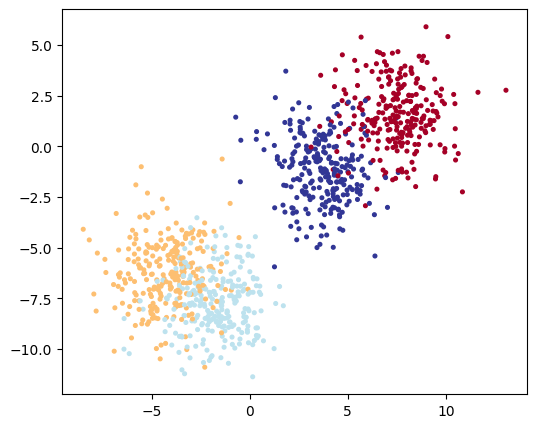

In [2]:
# set hyperparameters for data creation
NUM_SAMPLES = 1000
NUM_FEATURES = 2
NUM_CLASSES = 4

# 1. create multi-class data
xblob, yblob = make_blobs(n_samples=NUM_SAMPLES,
                          n_features=NUM_FEATURES,
                          centers=NUM_CLASSES,
                          cluster_std=1.5,       # give the clusters a little shake up
                          random_state=RANDOM_STATE)

# 2. turn data into tensors 
xblob = torch.from_numpy(xblob).type(torch.float)
yblob = torch.from_numpy(yblob).unsqueeze(-1).type(torch.float)
print(xblob.shape, yblob.shape)

# 3. split into train and test sets then we put them on target DEVICE
xblob_train, xblob_test, yblob_train, yblob_test = train_test_split(xblob, yblob,
                                                                    stratify=yblob,
                                                                    test_size=0.25,
                                                                    shuffle=True,
                                                                    random_state=RANDOM_STATE)
xblob_train, yblob_train = xblob_train.to(DEVICE), yblob_train.to(DEVICE)
xblob_test, yblob_test = xblob_test.to(DEVICE), yblob_test.to(DEVICE)

# 4. plot data (visualize! visualize!! visualize!!!)
plt.figure(figsize=(6, 5))
plt.scatter(xblob[:,0], xblob[:,1], c=yblob, s=7, cmap=plt.cm.RdYlBu)
plt.show()



In [3]:
# a look at our dataset
xblob_train[:5], yblob_train[:5]

(tensor([[ 4.4852,  2.0636],
         [-5.1405, -8.6564],
         [10.8447, -2.2462],
         [ 9.2048,  1.0944],
         [ 6.7810,  1.6513]]),
 tensor([[3.],
         [1.],
         [0.],
         [0.],
         [0.]]))

**building a multi-class classification model in pytorch**

In [4]:
# model creation
class BlobMdl(nn.Module):
    def __init__(self, input_features:int, num_classes:int, hidden_units:int=8):
        """ 
        Initializes multi-class classification model

        Args:
            input_features (int) - number of input features to the model
            num_classes (int) - number of distinct clusters present in the data
            hidden_units (int) - number of hidden units between layers [default = 8]

        Returns:
            Probability distribution of size num_classes         
        """
        super().__init__()
        self.linear_layer_stack = nn.Sequential(
            nn.Linear(input_features, hidden_units),
            nn.ReLU(),
            nn.Linear(hidden_units, hidden_units),
            nn.ReLU(),
            nn.Linear(hidden_units, num_classes)
        )

    def forward(self, x:torch.Tensor):
        return self.linear_layer_stack(x)
        
# model initialization
MultMdl = BlobMdl(input_features=NUM_FEATURES,
                  num_classes=NUM_CLASSES).to(DEVICE)


In [5]:
MultMdl

BlobMdl(
  (linear_layer_stack): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=8, bias=True)
    (3): ReLU()
    (4): Linear(in_features=8, out_features=4, bias=True)
  )
)

In [6]:
MultMdl.state_dict()

OrderedDict([('linear_layer_stack.0.weight',
              tensor([[-0.4885, -0.2258],
                      [ 0.6262,  0.0841],
                      [ 0.4853, -0.0190],
                      [ 0.0331, -0.2991],
                      [-0.1947, -0.6546],
                      [ 0.0627,  0.1307],
                      [-0.5911,  0.1161],
                      [-0.0383, -0.0830]])),
             ('linear_layer_stack.0.bias',
              tensor([-0.4992, -0.0440, -0.5834, -0.4528,  0.2112, -0.3750, -0.4980,  0.6488])),
             ('linear_layer_stack.2.weight',
              tensor([[ 0.0284,  0.2138,  0.0322, -0.0897,  0.2529,  0.2040, -0.2517, -0.2629],
                      [-0.2694,  0.0224, -0.0518,  0.0449, -0.1877, -0.2687, -0.1249,  0.1750],
                      [ 0.1463, -0.1011, -0.3053, -0.2878,  0.0276, -0.1038,  0.1439,  0.1812],
                      [ 0.2787,  0.2283,  0.0350, -0.0114, -0.1667, -0.3463,  0.0903, -0.3096],
                      [-0.2830, -0.3110, -0.042

**defining loss and choosing optimizer**

In [7]:
criterion = nn.CrossEntropyLoss() # loss function

optimizer = torch.optim.SGD(MultMdl.parameters(), lr=0.1) # optimization alg.

In [8]:
# evaluation metric
def check_accuracy(prediction, ground_truth):
    """
        Checks prediction accuracy:
            
        Args:
            prediction - model's predicted values
            ground_truth - labels of dataset
            
        Return:
            acc [range: 0 - 100%] 
    """
    correct = torch.eq(prediction, ground_truth).sum().item()
    acc = correct / len(ground_truth)
    return acc * 100

**comments: in order to evaluate and train and test our model, we need to convert our model's outputs (logits) to prediction probabilities and then to prediction labels.** 

**logits (mdl output) --> prediction probabilities (softmax) --> prediction labels (argmax)**

In [9]:
# first, get predictions for our multi-class model 
MultMdl.eval()
with torch.inference_mode():
    ylogits = MultMdl(xblob_test)

ylogits[:5] # logits

tensor([[-0.3671,  0.8792, -1.4975, -0.2778],
        [-0.4232,  0.2750, -2.0013, -0.2628],
        [-0.2525,  0.6419, -1.0288, -0.2332],
        [-0.3907,  0.8377, -1.4744, -0.2869],
        [-0.3829,  0.2355, -1.4781, -0.2462]])

In [10]:
# prediction probabilities
yprobs = torch.softmax(ylogits[:5], dim=1)
yprobs

tensor([[0.1697, 0.5900, 0.0548, 0.1855],
        [0.2278, 0.4578, 0.0470, 0.2674],
        [0.2030, 0.4966, 0.0934, 0.2070],
        [0.1705, 0.5825, 0.0577, 0.1892],
        [0.2306, 0.4279, 0.0771, 0.2644]])

In [11]:
# prediction labels - the index of max value for each row (yprob) is the label
ypreds = torch.argmax(yprobs, dim=-1)
ypreds #.unsqueeze(-1)

tensor([1, 1, 1, 1, 1])

**creating a training and testing loop**

In [12]:
epochs = 100

for epoch in range(epochs):
    # training loop
    MultMdl.train()
    optimizer.zero_grad()
    train_logits = MultMdl(xblob_train)
    train_probs = torch.softmax(train_logits, dim=-1)
    train_preds = torch.argmax(train_probs, dim=-1)
    train_loss = criterion(train_probs, yblob_train.squeeze().long())
    train_loss.backward()
    optimizer.step()

    if (epoch % 10 == 0) or (epoch == epochs-1):
        # testing loop
        MultMdl.eval()
        with torch.inference_mode():
            test_logits = MultMdl(xblob_test)
            test_probs = torch.softmax(test_logits, dim=-1)
            test_preds = torch.argmax(test_probs, dim=-1)
            test_loss = criterion(test_probs, yblob_test.squeeze().long())

        # show performance after every 10 epochs
        train_acc = check_accuracy(train_preds, yblob_train.squeeze())
        test_acc = check_accuracy(test_preds, yblob_test.squeeze())

        print(
            f'Epoch: {epoch} | Train Loss: {train_loss:.5f} | Train Acc: {train_acc:.2f}% | Test Loss: {test_loss:.5f} | Test Acc: {test_acc:.2f}%'
        )



Epoch: 0 | Train Loss: 1.37677 | Train Acc: 25.07% | Test Loss: 1.37134 | Test Acc: 24.80%
Epoch: 10 | Train Loss: 1.29239 | Train Acc: 49.87% | Test Loss: 1.28696 | Test Acc: 50.00%
Epoch: 20 | Train Loss: 1.22688 | Train Acc: 50.00% | Test Loss: 1.22397 | Test Acc: 50.00%
Epoch: 30 | Train Loss: 1.20356 | Train Acc: 50.00% | Test Loss: 1.20153 | Test Acc: 50.00%
Epoch: 40 | Train Loss: 1.19395 | Train Acc: 50.00% | Test Loss: 1.19197 | Test Acc: 50.00%
Epoch: 50 | Train Loss: 1.18707 | Train Acc: 50.00% | Test Loss: 1.18528 | Test Acc: 50.00%
Epoch: 60 | Train Loss: 1.18084 | Train Acc: 50.00% | Test Loss: 1.17939 | Test Acc: 50.00%
Epoch: 70 | Train Loss: 1.17477 | Train Acc: 50.67% | Test Loss: 1.17368 | Test Acc: 51.60%
Epoch: 80 | Train Loss: 1.16868 | Train Acc: 52.80% | Test Loss: 1.16790 | Test Acc: 54.40%
Epoch: 90 | Train Loss: 1.16236 | Train Acc: 53.87% | Test Loss: 1.16188 | Test Acc: 57.20%
Epoch: 99 | Train Loss: 1.15635 | Train Acc: 55.47% | Test Loss: 1.15618 | Test A

# 88